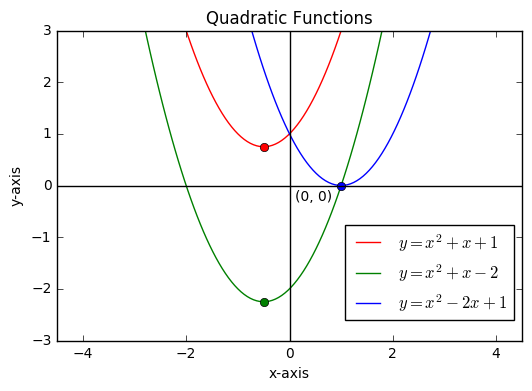

In [1]:
# Aquí tenemos la grafica que vimos antes en la presentación.

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 100)

def f(x,a,b,c):
   return a*x**2+b*x+c;

def vertex(a,b,c):
   x0 = -b/(2.0*a)
   y0 = c-b*b/(4.0*a)
   return [x0, y0]

plt.plot(x, f(x,1,1,1), label='$y=x^{2}+x+1$',color='red')
plt.plot(x, f(x,1,1,-2), label='$y=x^{2}+x-2$',color='green')
plt.plot(x, f(x,1,-2,1), label='$y=x^{2}-2x+1$',color='blue')
a1, b1 = vertex(1,1,1)
plt.plot([a1],[b1], 'ro')
a2, b2 = vertex(1,1,-2)
plt.plot([a2],[b2], 'go')
a3, b3 = vertex(1,-2,1)
plt.plot([a3],[b3], 'bo')
plt.axis('equal')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title("Quadratic Functions")
plt.annotate('(0, 0)', xy=(0, 0), xytext=(.1, -.3))
plt.axis([-3, 3, -3, 3])
plt.legend(bbox_to_anchor=(1, .4))
plt.show()

In [2]:
from collections import OrderedDict

from IPython.display import display, Javascript
from ipywidgets import interactive, Select, HBox

import pandas as pd

In [3]:
# Definimos los parametros basicos de los diferentes graficos a mostrar en este ejemplo.
OBS_DF = pd.read_csv('sources/aus_weather_obs_2015-2016.csv')
OBS_DF = OBS_DF.query('station_number == {} and season == "{}"'
                      .format(86338, 'Winter 2015'))
OBS_DF = OBS_DF.set_index(['valid_15z_date'])

FCST_DF = pd.read_csv('sources/aus_weather_fcst_2015-2016.csv')
FCST_DF = FCST_DF.query('station_number == {} and season == "{}"'.format(86338, 'Winter 2015'))
FCST_DF = FCST_DF.set_index(['valid_15z_date'])

In [4]:
# Establecemos los bordes para las graficas.
_MIN_T = -10
_MAX_T = 40

<IPython.core.display.Javascript object>


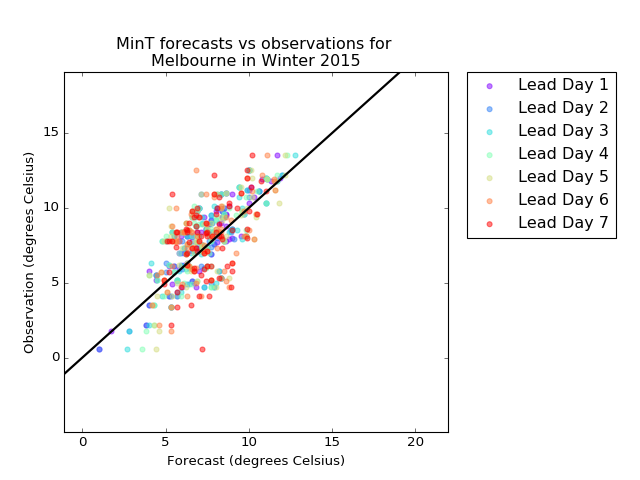

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib notebook    

def plot_mpl(**kwargs):
    """Función que dibuja los datos suministrados en el bloque de parametros
    usando Matplotlib"""
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

    lead_days = FCST_DF['lead_day'].unique()
    colors = iter(cm.rainbow(np.linspace(0, 1, len(lead_days))))

    y = OBS_DF['MinT']

    for lead_day in lead_days:
        x = FCST_DF.query('lead_day == {}'.format(lead_day))['MinT']
        plt.scatter(x, y, 
                    color=next(colors), alpha=0.5, 
                    label='Lead Day {}'.format(lead_day))

    plt.plot([_MIN_T, _MAX_T], [_MIN_T, _MAX_T], 'k-', lw=2)

    ax.set_xlim([_MIN_T, _MAX_T])
    ax.set_ylim([_MIN_T, _MAX_T])

    ax.set_xlabel('Forecast (degrees Celsius)')
    ax.set_ylabel('Observation (degrees Celsius)')

    plt.title('MinT forecasts vs observations for \nMelbourne in Winter 2015')

    plt.legend(scatterpoints=1, 
               bbox_to_anchor=(1.05, 1), 
               loc=2, 
               borderaxespad=0.)

plot_mpl()

In [ ]:
import bokeh
from bokeh.plotting import show
from bokeh.models import ColumnDataSource, Range1d, glyphs
from bokeh.charts import Scatter
from bokeh.io import output_notebook
from bokeh.resources import INLINE

output_notebook(resources=INLINE)

def plot_bokeh(**kwargs):
    """Función que dibuja los datos suministrados en el bloque de parametros
    usando bokeh"""
    tools = 'hover,resize,pan,wheel_zoom,box_zoom,reset,tap,previewsave,box_select'   

    y = OBS_DF['MinT']
        
    data = pd.DataFrame(columns=[
        'Observation (degrees Celsius)',
        'Forecast (degrees Celsius)',
        'Lead Day'
    ])

    for lead_day in FCST_DF['lead_day'].unique():
        x = FCST_DF.query('lead_day == {}'.format(lead_day))['MinT']

        curr_lead_day = pd.DataFrame()
        curr_lead_day['Forecast (degrees Celsius)'] = x        
        curr_lead_day['Observation (degrees Celsius)'] = y
        curr_lead_day['Lead Day'] = 'Lead Day {}'.format(lead_day)
        data = pd.concat([data, curr_lead_day], ignore_index=True)
        
    fig = Scatter(
        data,
        x='Forecast (degrees Celsius)',
        y='Observation (degrees Celsius)',
        color='Lead Day',
        legend='top_right',
        title='MinT forecasts vs observations for Melbourne in Winter 2015',
        tools=tools
    )

    # Add a line for y=x
    fig.add_glyph(
        ColumnDataSource(
            {'x': [_MIN_T, _MAX_T],
             'y': [_MIN_T, _MAX_T]}),
        glyphs.Line(x='x', y='y', line_width=2, line_color='black')
    )
    
    fig.set(
        x_range=Range1d(_MIN_T, _MAX_T),
        y_range=Range1d(_MIN_T, _MAX_T),
    )

    show(fig)
    
plot_bokeh()

In [ ]:
import plotly
from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=False)

def plot_plotly(**kwargs):
    """Función que dibuja los datos suministrados en el bloque de parametros
    usando plotly"""
    y = OBS_DF['MinT']
    
    data = []
    for lead_day in FCST_DF['lead_day'].unique():
        x = FCST_DF.query('lead_day == {}'.format(lead_day))['MinT']
                
        trace = go.Scatter(x=x, y=y,
                           mode='markers',
                           name="Lead Day {}".format(lead_day))
        data.append(trace)
    
    ideal = go.Scatter(x=[_MIN_T, _MAX_T], y=[_MIN_T, _MAX_T],
                       mode='lines', showlegend=False,
                       hoverinfo='none')
    data.append(ideal)
    
    layout = go.Layout(
        width=600, height=600, 
        title='MinT forecasts vs observations for Melbourne in Winter 2015',
        xaxis={'title': 'Forecast (degrees Celsius)',
               'range': [_MIN_T, _MAX_T],
               'gridcolor': '#BBBBBB', 'gridwidth': 1},  # high contrast gridlines
        yaxis={'title': 'Observation (degrees Celsius)',
               'range': [_MIN_T, _MAX_T],
               'gridcolor': '#BBBBBB', 'gridwidth': 1})  # high contrast gridlines

    figure = go.Figure(data=data, layout=layout)
    iplot(figure, show_link=False)
    
plot_plotly()